In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
def load_housing_data():
    tarball_path=Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


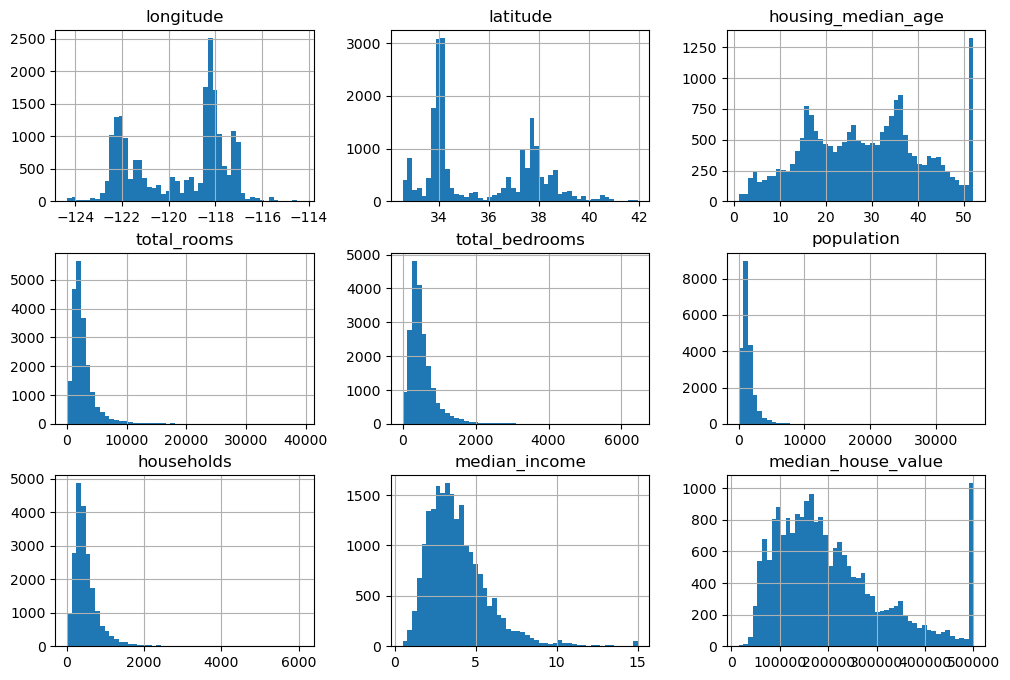

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

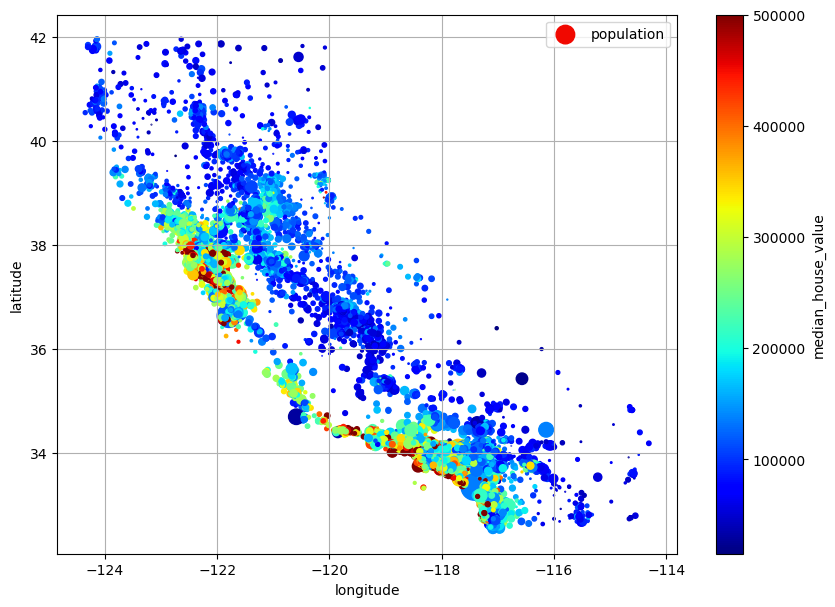

In [9]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=housing["population"]/100,label="population",c="median_house_value",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
num_pipeline=make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

In [11]:
from sklearn.compose import make_column_selector,make_column_transformer
Preprocessing=make_column_transformer((num_pipeline,make_column_selector(dtype_include=np.number)),(cat_pipeline,make_column_selector(dtype_include=object)))

In [ ]:
housing=Preprocessing.fit_transform(housing)

In [89]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

In [90]:
corr_matrix=housing.drop('ocean_proximity',axis='columns').corr()

In [91]:
corr_matrix["median_house_value"].sort_values(ascending=True)

bedrooms_ratio       -0.255880
latitude             -0.144160
longitude            -0.045967
population           -0.024650
people_per_house     -0.023737
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
rooms_per_house       0.151948
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [92]:
housing.drop(['total_rooms','households','total_bedrooms','population'],axis='columns')

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [93]:
housing_labels=housing["median_house_value"]
housing=housing.drop('median_house_value',axis=1)

In [94]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest_reg=make_pipeline(Preprocessing,RandomForestClassifier(random_state=42))
forest_rmses=cross_val_score(forest_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)


/opt/homebrew/anaconda3/envs/ai_ml_llm/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


: 

In [ ]:
pd.Series(forest_rmses).describe()